In [4]:
import pandas as pd
import os

def Create_Directory_DataFrame():
    df_list = []  
    basedir = 'A. Segmentation/1. Original Images/'
    
    for Class in os.listdir(basedir):
        class_dir = os.path.join(basedir, Class)
        if os.path.isdir(class_dir): 
            for location in os.listdir(class_dir):
                if location.endswith('.jpg'):
                    
                    class_name = Class.split('.')[1].strip() if '.' in Class else Class
                    image_id = location.split('.')[0].split('_')[1]
                    df_list.append({
                        'Class': class_name,
                        'Location': os.path.join(class_dir, location),
                        'ID': image_id
                    })
    

    df = pd.DataFrame(df_list)
    df = df.sample(frac=1).reset_index(drop=True)  
    return df

df1 = Create_Directory_DataFrame()
print(df1.shape)
df1.head()


(81, 3)


,Class,Location,ID
0,Training Set,A. Segmentation/1. Original Images/a. Training...,35
1,Training Set,A. Segmentation/1. Original Images/a. Training...,06
2,Testing Set,A. Segmentation/1. Original Images/b. Testing ...,68
3,Training Set,A. Segmentation/1. Original Images/a. Training...,17
4,Testing Set,A. Segmentation/1. Original Images/b. Testing ...,59


In [5]:
import pandas as pd
import os

def Create_Directory_DataFrame():
    records = [] 
    basedir = '/Users/sheebamoghal/Desktop/DSAN-6600/project/A. Segmentation/2. All Segmentation Groundtruths/'

    for Class in os.listdir(basedir):
        class_path = os.path.join(basedir, Class)
        if os.path.isdir(class_path):  
            for SubClass in os.listdir(class_path):
                subclass_path = os.path.join(class_path, SubClass)
                if os.path.isdir(subclass_path):  
                    for filename in os.listdir(subclass_path):
                        if filename.endswith('.tif'):
                            record = {
                                'Class': Class,
                                'SubClass': SubClass,
                                'Location': os.path.join(subclass_path, filename),
                                'ID': filename.split('.')[0].split('_')[1]
                            }
                            records.append(record)

    df = pd.DataFrame.from_records(records) 
    df = df.sample(frac=1).reset_index(drop=True)  
    return df

df = Create_Directory_DataFrame()
print(df.shape)
df.head()


(363, 4)


,Class,SubClass,Location,ID
0,a. Training Set,4. Soft Exudates,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,32
1,a. Training Set,5. Optic Disc,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,54
2,a. Training Set,4. Soft Exudates,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,52
3,a. Training Set,3. Hard Exudates,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,19
4,a. Training Set,1. Microaneurysms,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,26


In [6]:
df.groupby(['SubClass']).count()

,Class,Location,ID
SubClass,,,
1. Microaneurysms,81,81,81
2. Haemorrhages,80,80,80
3. Hard Exudates,81,81,81
4. Soft Exudates,40,40,40
5. Optic Disc,81,81,81


In [7]:
fdf = pd.merge(df, df1, left_on='ID', right_on='ID')
fdf.head()

,Class_x,SubClass,Location_x,ID,Class_y,Location_y
0,a. Training Set,4. Soft Exudates,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,32,Training Set,A. Segmentation/1. Original Images/a. Training...
1,a. Training Set,2. Haemorrhages,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,32,Training Set,A. Segmentation/1. Original Images/a. Training...
2,a. Training Set,1. Microaneurysms,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,32,Training Set,A. Segmentation/1. Original Images/a. Training...
3,a. Training Set,3. Hard Exudates,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,32,Training Set,A. Segmentation/1. Original Images/a. Training...
4,a. Training Set,5. Optic Disc,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,32,Training Set,A. Segmentation/1. Original Images/a. Training...


In [8]:
print(fdf['SubClass'].unique())

['4. Soft Exudates' '2. Haemorrhages' '1. Microaneurysms'
 '3. Hard Exudates' '5. Optic Disc']


In [9]:
w,h = 2848,4288
#w,h=512,512
from tqdm import tqdm
def load_img(addr,w,h):
    img = cv2.imread(addr,0)
    img = cv2.resize(img, (w,h), interpolation = cv2.INTER_AREA)
    img = img.reshape(w,h,1)
    return img
def load_mask(addr, w, h):
    im = Image.open(addr)
    imarray = np.array(im)
    img = cv2.resize(imarray, (w, h), interpolation=cv2.INTER_AREA)
    img = img.reshape(w, h, 3) 

def load_data(df,w,h):
    Image = []
    Masks = []
    for i in tqdm(df.index):
        Image.append(load_img(df.loc[i]['Location_x'],w,h))
        Masks.append(load_mask(df.loc[i]['Location_y'],w,h))
    return np.float32(np.array(Image)) , np.float32(np.array(Masks))

segment_choice = '2. Haemorrhages'
seg_df = fdf[fdf['SubClass'] ==  segment_choice]
print(seg_df.shape)
seg_df.head()


(80, 6)


,Class_x,SubClass,Location_x,ID,Class_y,Location_y
1,a. Training Set,2. Haemorrhages,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,32,Training Set,A. Segmentation/1. Original Images/a. Training...
9,a. Training Set,2. Haemorrhages,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,54,Training Set,A. Segmentation/1. Original Images/a. Training...
12,a. Training Set,2. Haemorrhages,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,52,Training Set,A. Segmentation/1. Original Images/a. Training...
18,a. Training Set,2. Haemorrhages,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,19,Training Set,A. Segmentation/1. Original Images/a. Training...
22,a. Training Set,2. Haemorrhages,/Users/sheebamoghal/Desktop/DSAN-6600/project/...,26,Training Set,A. Segmentation/1. Original Images/a. Training...


(2848, 4288, 3)


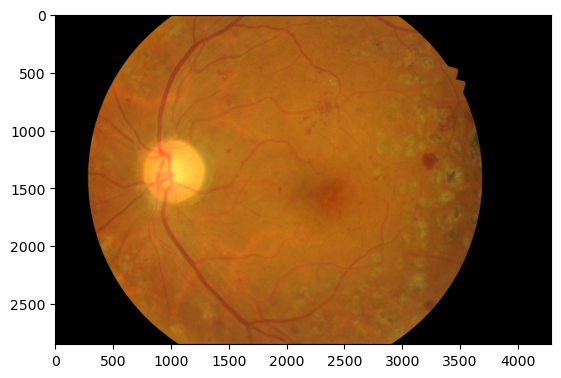

In [10]:
from PIL import Image
im = Image.open(fdf.iloc[21,5])
imarray = np.array(im)
plt.imshow(imarray)
print(imarray.shape)

(2848, 4288, 3)


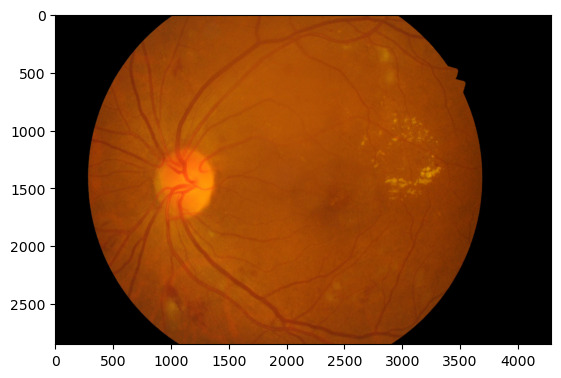

In [11]:
from PIL import Image
im = Image.open(fdf.iloc[1,5])
imarray = np.array(im)
plt.imshow(imarray)
print(imarray.shape)

In [12]:
X, Y = load_data(seg_df,w,h)

100%|██████████| 80/80 [00:08<00:00,  9.73it/s]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [15]:
from transformers import ViTFeatureExtractor, ViTModel
import torch.nn as nn

class CustomUNet(nn.Module):
    def __init__(self):
        super(CustomUNet, self).__init__()
        self.backbone = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
        
        # Implement decoder layers that upsample the feature map and concatenate
        # with features from the encoder part, similar to a typical U-Net architecture.
        # This part needs to be customized based on your specific requirements.
        self.decoder = nn.Sequential(
            # Decoder layers
        )
        
        self.final_conv = nn.Conv2d(in_channels=decoder_channels, out_channels=1, kernel_size=1)
    
    def forward(self, x):
        # Forward pass through backbone and decoder
        return x

# Example usage
# model = CustomUNet()
# feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")


In [16]:
from transformers import ViTFeatureExtractor
from PIL import Image
import requests

# Load an image
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# Preprocess it
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
inputs = feature_extractor(images=image, return_tensors="pt")


Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

: 